torch.Size([2, 3, 500, 500])


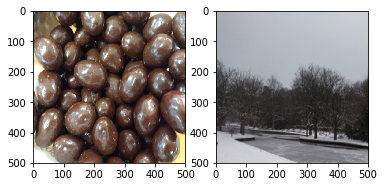

In [2]:
import torch
from torch import nn
from torchvision import transforms, utils
from torch.autograd import Variable, gradcheck
from roi_align.crop_and_resize import CropAndResizeFunction
import matplotlib.pyplot as plt
from skimage.io import imread


def to_varabile(tensor, requires_grad=False, is_cuda=True):
    if is_cuda:
        tensor = tensor.cuda()
    var = Variable(tensor, requires_grad=requires_grad)
    return var


crop_height = 500
crop_width = 500
is_cuda = torch.cuda.is_available()

# In this simple example the number of images and boxes is 2
img_path1 = '../tests/images/choco.png'
img_path2 = '../tests/images/snow.png'

# Define the boxes ( crops )
# box = [y1/heigth , x1/width , y2/heigth , x2/width]
boxes_data = torch.FloatTensor([[0, 0, 1, 1], [0, 0, 0.5, 0.5]])

# Create an index to say which box crops which image
box_index_data = torch.IntTensor([0, 1])

# Import the images from file
image_data1 = transforms.ToTensor()(imread(img_path1)).unsqueeze(0)
image_data2 = transforms.ToTensor()(imread(img_path2)).unsqueeze(0)

# Create a batch of 2 images
image_data = torch.cat((image_data1, image_data2), 0)

# Convert from numpy to Variables
image_torch = to_varabile(image_data, is_cuda=is_cuda)
boxes = to_varabile(boxes_data, is_cuda=is_cuda)
box_index = to_varabile(box_index_data, is_cuda=is_cuda)

# Crops and resize bbox1 from img1 and bbox2 from img2
crops_torch = CropAndResizeFunction(crop_height, crop_width, 0)(image_torch, boxes, box_index)

# Visualize the crops
print(crops_torch.data.size())
crops_torch_data = crops_torch.data.cpu().numpy().transpose(0, 2, 3, 1)
fig = plt.figure()
plt.subplot(121)
plt.imshow(crops_torch_data[0])
plt.subplot(122)
plt.imshow(crops_torch_data[1])
plt.show()
